In [1]:
import pandas as pd
import numpy as np
import mta

In [2]:
turnstile = pd.concat([mta.load_mta('2015-08-01','2015-09-30'),mta.load_mta('2016-08-01','2016-09-30'),
                       mta.load_mta('2017-08-01','2017-09-30'),mta.load_mta('2018-08-01','2018-09-30'),
                       mta.load_mta('2019-08-01','2019-09-30')])

turnstile.head() 

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,07/25/2015,00:00:00,REGULAR,5239572,1772534
1,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,07/25/2015,04:00:00,REGULAR,5239606,1772535
2,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,07/25/2015,08:00:00,REGULAR,5239633,1772563
3,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,07/25/2015,12:00:00,REGULAR,5239754,1772660
4,A002,R051,02-00-00,LEXINGTON AVE,NQR456,BMT,07/25/2015,16:00:00,REGULAR,5240012,1772711


In [3]:
turnstile = mta.clean_mta(turnstile)
turnstile.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DESC,ENTRIES,EXITS,datetime,hour,day_of_week,riders_in,match
0,H007,R248,00-00-00,1 AV,L,BMT,REGULAR,11359721,12411251,2016-07-30 00:00:00,0,Sa,NaN,False
1,H007,R248,00-00-00,1 AV,L,BMT,REGULAR,11359824,12411544,2016-07-30 04:00:00,4,Sa,103.0,True
2,H007,R248,00-00-00,1 AV,L,BMT,REGULAR,11359884,12411832,2016-07-30 08:00:00,8,Sa,60.0,True
3,H007,R248,00-00-00,1 AV,L,BMT,REGULAR,11360338,12412492,2016-07-30 12:00:00,12,Sa,454.0,True
4,H007,R248,00-00-00,1 AV,L,BMT,REGULAR,11361055,12413531,2016-07-30 16:00:00,16,Sa,717.0,True


In [4]:
turnstile = mta.dedup(turnstile)

/Users/drewhibbard/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [6]:
turnstile['date'] = turnstile.datetime.dt.date
by_date = pd.DataFrame(turnstile.groupby(['STATION','date'])['riders_in'].sum().reset_index())

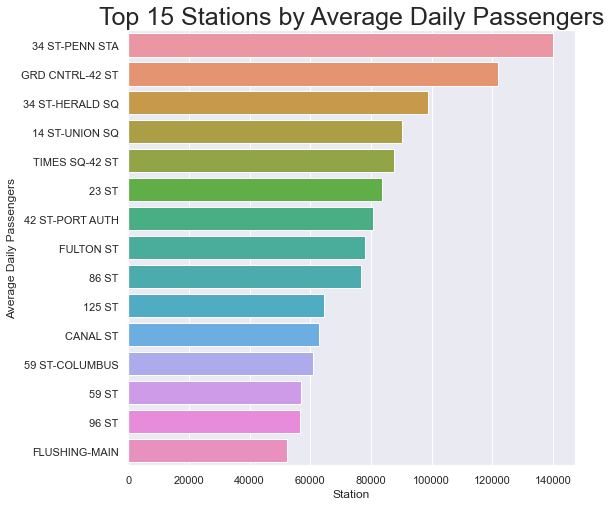

In [7]:
by_station = pd.DataFrame(by_date.groupby('STATION').riders_in.mean().sort_values(ascending=False).head(15))

plt.figure(figsize=(8,8))
sns.barplot(y=by_station.index,x='riders_in',data=by_station)
plt.xlabel('Station')
plt.ylabel('Average Daily Passengers')
plt.title('Top 15 Stations by Average Daily Passengers',fontsize=25)
plt.savefig('top15.png',dpi=500);

In [8]:
turnstile = turnstile.loc[turnstile['STATION'].isin(by_station.index)]

In [9]:
reorder_list = ['M','Tu','W','Th','F','Sa','Su']
by_weekday_date = pd.DataFrame(turnstile.groupby(['day_of_week','date']).riders_in.sum()).reset_index()
by_weekday = pd.DataFrame(by_weekday_date.groupby('day_of_week').riders_in.mean().sort_values(ascending=False).head(20)).reindex(reorder_list)

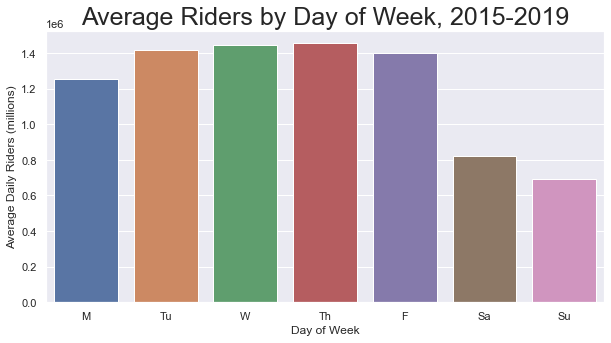

In [10]:
plt.figure(figsize=(10,5))
sns.barplot(x=by_weekday.index,y='riders_in',data=by_weekday)
plt.xlabel('Day of Week')
plt.ylabel('Average Daily Riders (millions)')
plt.title('Average Riders by Day of Week, 2015-2019',fontsize=25);

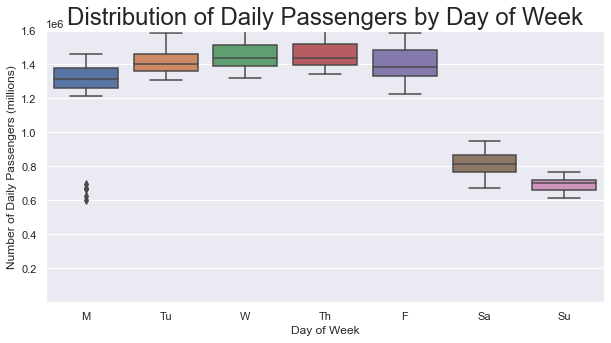

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x='day_of_week',y='riders_in',data=by_weekday_date,order=['M','Tu','W','Th','F','Sa','Su'])
plt.xlabel('Day of Week')
plt.ylabel('Number of Daily Passengers (millions)')
plt.title('Distribution of Daily Passengers by Day of Week',fontsize=24)
plt.ylim(1,1600000)
plt.savefig('dayofweek.png',dpi=500);

In [ ]:
turnstile['time'] = pd.cut(turnstile.hour,bins=np.linspace(0,24,7))

by_time_date = pd.DataFrame(turnstile.groupby(['time','date']).riders_in.sum()).reset_index()
by_time = pd.DataFrame(by_time_date.groupby('time').riders_in.mean().sort_values(ascending=False).head(20))

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x=by_time.index,y='riders_in',data=by_time)
plt.xlabel('Time Range (hour)')
plt.ylabel('Average Passengers')
plt.title('Average Daily Passengers per 4-hour Time Window',fontsize=25)
plt.ticklabel_format(style='plain',axis='y')
plt.savefig('byhour.png',dpi=500);